In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'

In [2]:
from qgis import processing
from qgis.utils import iface
from qgis.core import *
from qgis.gui import *

In [3]:
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from qgis.PyQt.QtGui import QColor, QImage

In [4]:
qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/josea/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/josea/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [5]:
import urllib.request
url = 'https://github.com/jgrocha/covid-pt/tree/master/European%20Centre%20for%20Disease%20Prevention%20and%20Control'
filename = '20200512.csv'
data = urllib.request.urlretrieve(url, filename)

In [6]:
print(data)

('20200512.csv', <http.client.HTTPMessage object at 0x00000283C2C30E10>)


In [11]:
# Libraries needed for the tutorial
import io
import urllib.request as request
import csv
import pandas as pd
import requests

In [9]:
r = request.urlopen('https://github.com/jgrocha/covid-pt/blob/master/European%20Centre%20for%20Disease%20Prevention%20and%20Control/20200512.csv').read().decode('utf8').split("\n")
reader = csv.reader(r)
for line in reader:
    print(line)

[]
[]
[]
[]
[]
[]
['<!DOCTYPE html>']
['<html lang="en">']
['  <head>']
['    <meta charset="utf-8">']
['  <link rel="dns-prefetch" href="https://github.githubassets.com">']
['  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">']
['  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">']
['  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">']
['  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">']
['  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">']
['  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">']
[]
[]
[]
['  <link crossorigin="anonymous" media="all" integrity="sha512-FG+rXqMOivrAjdEQE7tO4BwM1poGmg70hJFTlNSxjX87grtrZ6UnPR8NkzwUHlQEGviu9XuRYeO8zH9YwvZhdg==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-146fab5ea30e8afac08dd11013bb4ee0.css" />']
['  <link crossorigin="anonymous" media="all" integrity="sha512-iWnTv9+yroeJ

['        <td id="L657" class="blob-num js-line-number" data-line-number="657"></td>']
['        <td id="LC657" class="blob-code blob-code-inner js-file-line">27/02/2020', '27', '2', '2020', '0', '0', 'Armenia', 'AM', 'ARM', '2951776', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L658" class="blob-num js-line-number" data-line-number="658"></td>']
['        <td id="LC658" class="blob-code blob-code-inner js-file-line">26/02/2020', '26', '2', '2020', '0', '0', 'Armenia', 'AM', 'ARM', '2951776', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L659" class="blob-num js-line-number" data-line-number="659"></td>']
['        <td id="LC659" class="blob-code blob-code-inner js-file-line">25/02/2020', '25', '2', '2020', '0', '0', 'Armenia', 'AM', 'ARM', '2951776', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L660" class="blob-num js-line-number" data-line-number="660"></td>']
['        <td id="LC660" class="blob-code blob-code-inner js-file-l

['      <tr>']
['        <td id="L1407" class="blob-num js-line-number" data-line-number="1407"></td>']
['        <td id="LC1407" class="blob-code blob-code-inner js-file-line">07/05/2020', '7', '5', '2020', '0', '0', 'Barbados', 'BB', 'BRB', '286641', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L1408" class="blob-num js-line-number" data-line-number="1408"></td>']
['        <td id="LC1408" class="blob-code blob-code-inner js-file-line">06/05/2020', '6', '5', '2020', '0', '0', 'Barbados', 'BB', 'BRB', '286641', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L1409" class="blob-num js-line-number" data-line-number="1409"></td>']
['        <td id="LC1409" class="blob-code blob-code-inner js-file-line">05/05/2020', '5', '5', '2020', '0', '0', 'Barbados', 'BB', 'BRB', '286641', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L1410" class="blob-num js-line-number" data-line-number="1410"></td>']
['        <td id="LC1410" class="blob-cod

['        <td id="L2222" class="blob-num js-line-number" data-line-number="2222"></td>']
['        <td id="LC2222" class="blob-code blob-code-inner js-file-line">13/02/2020', '13', '2', '2020', '0', '0', 'Brazil', 'BR', 'BRA', '209469333', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L2223" class="blob-num js-line-number" data-line-number="2223"></td>']
['        <td id="LC2223" class="blob-code blob-code-inner js-file-line">12/02/2020', '12', '2', '2020', '0', '0', 'Brazil', 'BR', 'BRA', '209469333', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L2224" class="blob-num js-line-number" data-line-number="2224"></td>']
['        <td id="LC2224" class="blob-code blob-code-inner js-file-line">11/02/2020', '11', '2', '2020', '0', '0', 'Brazil', 'BR', 'BRA', '209469333', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L2225" class="blob-num js-line-number" data-line-number="2225"></td>']
['        <td id="LC2225" class="blob-code blob-co

['      </tr>']
['      <tr>']
['        <td id="L3157" class="blob-num js-line-number" data-line-number="3157"></td>']
['        <td id="LC3157" class="blob-code blob-code-inner js-file-line">19/04/2020', '19', '4', '2020', '478', '10', 'Chile', 'CL', 'CHL', '18729160', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L3158" class="blob-num js-line-number" data-line-number="3158"></td>']
['        <td id="LC3158" class="blob-code blob-code-inner js-file-line">18/04/2020', '18', '4', '2020', '445', '11', 'Chile', 'CL', 'CHL', '18729160', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L3159" class="blob-num js-line-number" data-line-number="3159"></td>']
['        <td id="LC3159" class="blob-code blob-code-inner js-file-line">17/04/2020', '17', '4', '2020', '534', '11', 'Chile', 'CL', 'CHL', '18729160', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L3160" class="blob-num js-line-number" data-line-number="3160"></td>']
['        <td id

['      </tr>']
['      <tr>']
['        <td id="L4157" class="blob-num js-line-number" data-line-number="4157"></td>']
['        <td id="LC4157" class="blob-code blob-code-inner js-file-line">24/02/2020', '24', '2', '2020', '0', '0', 'Denmark', 'DK', 'DNK', '5797446', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L4158" class="blob-num js-line-number" data-line-number="4158"></td>']
['        <td id="LC4158" class="blob-code blob-code-inner js-file-line">23/02/2020', '23', '2', '2020', '0', '0', 'Denmark', 'DK', 'DNK', '5797446', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L4159" class="blob-num js-line-number" data-line-number="4159"></td>']
['        <td id="LC4159" class="blob-code blob-code-inner js-file-line">22/02/2020', '22', '2', '2020', '0', '0', 'Denmark', 'DK', 'DNK', '5797446', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L4160" class="blob-num js-line-number" data-line-number="4160"></td>']
['        <td id="LC4160"

['        <td id="LC4906" class="blob-code blob-code-inner js-file-line">27/03/2020', '27', '3', '2020', '134', '0', 'Estonia', 'EE', 'EST', '1320884', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L4907" class="blob-num js-line-number" data-line-number="4907"></td>']
['        <td id="LC4907" class="blob-code blob-code-inner js-file-line">26/03/2020', '26', '3', '2020', '35', '1', 'Estonia', 'EE', 'EST', '1320884', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L4908" class="blob-num js-line-number" data-line-number="4908"></td>']
['        <td id="LC4908" class="blob-code blob-code-inner js-file-line">25/03/2020', '25', '3', '2020', '17', '0', 'Estonia', 'EE', 'EST', '1320884', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L4909" class="blob-num js-line-number" data-line-number="4909"></td>']
['        <td id="LC4909" class="blob-code blob-code-inner js-file-line">24/03/2020', '24', '3', '2020', '26', '0', 'Estonia', 'EE', 'EST', '

['        <td id="LC5781" class="blob-code blob-code-inner js-file-line">28/01/2020', '28', '1', '2020', '0', '0', 'Georgia', 'GE', 'GEO', '3731000', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L5782" class="blob-num js-line-number" data-line-number="5782"></td>']
['        <td id="LC5782" class="blob-code blob-code-inner js-file-line">27/01/2020', '27', '1', '2020', '0', '0', 'Georgia', 'GE', 'GEO', '3731000', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L5783" class="blob-num js-line-number" data-line-number="5783"></td>']
['        <td id="LC5783" class="blob-code blob-code-inner js-file-line">26/01/2020', '26', '1', '2020', '0', '0', 'Georgia', 'GE', 'GEO', '3731000', 'Europe</td>']
['      </tr>']
['      <tr>']
['        <td id="L5784" class="blob-num js-line-number" data-line-number="5784"></td>']
['        <td id="LC5784" class="blob-code blob-code-inner js-file-line">25/01/2020', '25', '1', '2020', '0', '0', 'Georgia', 'GE', 'GEO', '37310

['        <td id="L6781" class="blob-num js-line-number" data-line-number="6781"></td>']
['        <td id="LC6781" class="blob-code blob-code-inner js-file-line">18/03/2020', '18', '3', '2020', '1', '0', 'Honduras', 'HN', 'HND', '9587522', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L6782" class="blob-num js-line-number" data-line-number="6782"></td>']
['        <td id="LC6782" class="blob-code blob-code-inner js-file-line">17/03/2020', '17', '3', '2020', '2', '0', 'Honduras', 'HN', 'HND', '9587522', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L6783" class="blob-num js-line-number" data-line-number="6783"></td>']
['        <td id="LC6783" class="blob-code blob-code-inner js-file-line">16/03/2020', '16', '3', '2020', '3', '0', 'Honduras', 'HN', 'HND', '9587522', 'America</td>']
['      </tr>']
['      <tr>']
['        <td id="L6784" class="blob-num js-line-number" data-line-number="6784"></td>']
['        <td id="LC6784" class="blob-code blob-co

['        <td id="L7781" class="blob-num js-line-number" data-line-number="7781"></td>']
['        <td id="LC7781" class="blob-code blob-code-inner js-file-line">08/02/2020', '8', '2', '2020', '0', '0', 'Israel', 'IL', 'ISR', '8883800', 'Asia</td>']
['      </tr>']
['      <tr>']
['        <td id="L7782" class="blob-num js-line-number" data-line-number="7782"></td>']
['        <td id="LC7782" class="blob-code blob-code-inner js-file-line">07/02/2020', '7', '2', '2020', '0', '0', 'Israel', 'IL', 'ISR', '8883800', 'Asia</td>']
['      </tr>']
['      <tr>']
['        <td id="L7783" class="blob-num js-line-number" data-line-number="7783"></td>']
['        <td id="LC7783" class="blob-code blob-code-inner js-file-line">06/02/2020', '6', '2', '2020', '0', '0', 'Israel', 'IL', 'ISR', '8883800', 'Asia</td>']
['      </tr>']
['      <tr>']
['        <td id="L7784" class="blob-num js-line-number" data-line-number="7784"></td>']
['        <td id="LC7784" class="blob-code blob-code-inner js-file-l

['        <td id="L8656" class="blob-num js-line-number" data-line-number="8656"></td>']
['        <td id="LC8656" class="blob-code blob-code-inner js-file-line">03/04/2020', '3', '4', '2020', '0', '0', 'Laos', 'LA', 'LAO', '7061507', 'Asia</td>']
['      </tr>']
['      <tr>']
['        <td id="L8657" class="blob-num js-line-number" data-line-number="8657"></td>']
['        <td id="LC8657" class="blob-code blob-code-inner js-file-line">02/04/2020', '2', '4', '2020', '1', '0', 'Laos', 'LA', 'LAO', '7061507', 'Asia</td>']
['      </tr>']
['      <tr>']
['        <td id="L8658" class="blob-num js-line-number" data-line-number="8658"></td>']
['        <td id="LC8658" class="blob-code blob-code-inner js-file-line">01/04/2020', '1', '4', '2020', '0', '0', 'Laos', 'LA', 'LAO', '7061507', 'Asia</td>']
['      </tr>']
['      <tr>']
['        <td id="L8659" class="blob-num js-line-number" data-line-number="8659"></td>']
['        <td id="LC8659" class="blob-code blob-code-inner js-file-line">3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
# Downloading the csv file from your GitHub account
github_session = requests.Session()
url = "https://github.com/jgrocha/covid-pt/blob/master/European%20Centre%20for%20Disease%20Prevention%20and%20Control/20200512.csv" # Make sure the url is the raw version of the file on GitHub
download = github_session.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')), delimiter = ',', error_bad_lines=False)

# Printing out the first 5 rows of the dataframe

print (df.head())

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:2: ResourceWarning: unclosed <ssl.SSLSocket fd=2852, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.7', 65233), raddr=('140.82.118.4', 443)>
  


                                     <!DOCTYPE html>
0                                   <html lang="en">
1                                             <head>
2                             <meta charset="utf-8">
3    <link rel="dns-prefetch" href="https://githu...
4    <link rel="dns-prefetch" href="https://avata...


b'Skipping line 49: expected 1 fields, saw 2\nSkipping line 127: expected 1 fields, saw 3\nSkipping line 144: expected 1 fields, saw 6\nSkipping line 145: expected 1 fields, saw 3\nSkipping line 169: expected 1 fields, saw 4\nSkipping line 173: expected 1 fields, saw 2\nSkipping line 175: expected 1 fields, saw 2\nSkipping line 176: expected 1 fields, saw 2\nSkipping line 177: expected 1 fields, saw 2\nSkipping line 178: expected 1 fields, saw 2\nSkipping line 179: expected 1 fields, saw 2\nSkipping line 180: expected 1 fields, saw 2\nSkipping line 181: expected 1 fields, saw 2\nSkipping line 182: expected 1 fields, saw 2\nSkipping line 186: expected 1 fields, saw 2\nSkipping line 187: expected 1 fields, saw 2\nSkipping line 193: expected 1 fields, saw 2\nSkipping line 196: expected 1 fields, saw 2\nSkipping line 204: expected 1 fields, saw 4\nSkipping line 210: expected 1 fields, saw 2\nSkipping line 215: expected 1 fields, saw 2\nSkipping line 216: expected 1 fields, saw 2\nSkipping 

In [13]:
r = request.urlopen('https://raw.githubusercontent.com/jgrocha/covid-pt/master/European%20Centre%20for%20Disease%20Prevention%20and%20Control/20200512.csv').read().decode('utf8').split("\n")
reader = csv.reader(r)
for line in reader:
    print(line)

['dateRep', 'day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2018', 'continentExp']
['11/05/2020', '11', '5', '2020', '369', '5', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['10/05/2020', '10', '5', '2020', '255', '6', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['09/05/2020', '9', '5', '2020', '215', '3', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['08/05/2020', '8', '5', '2020', '171', '2', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['07/05/2020', '7', '5', '2020', '168', '9', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['06/05/2020', '6', '5', '2020', '330', '5', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['05/05/2020', '5', '5', '2020', '190', '5', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['04/05/2020', '4', '5', '2020', '235', '13', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['03/05/2020', '3', '5', '2020', '134', '4', 'Afghanistan', 'AF', 'AFG', '37172386', 'Asia']
['02/05/2020',

['11/05/2020', '11', '5', '2020', '33', '0', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['10/05/2020', '10', '5', '2020', '65', '1', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['09/05/2020', '9', '5', '2020', '31', '0', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['08/05/2020', '8', '5', '2020', '55', '2', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['07/05/2020', '7', '5', '2020', '52', '0', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['06/05/2020', '6', '5', '2020', '32', '1', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['05/05/2020', '5', '5', '2020', '34', '0', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['04/05/2020', '4', '5', '2020', '36', '2', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['03/05/2020', '3', '5', '2020', '29', '0', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['02/05/2020', '2', '5', '2020', '58', '1', 'Cote_dIvoire', 'CI', 'CIV', '25069229', 'Africa']
['01/05/2020', '1', '5', '2020', '37', '0', 'Cot

['20/03/2020', '20', '3', '2020', '2', '0', 'Haiti', 'HT', 'HTI', '11123176', 'America']
['11/05/2020', '11', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['10/05/2020', '10', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['09/05/2020', '9', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['08/05/2020', '8', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['07/05/2020', '7', '5', '2020', '1', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['06/05/2020', '6', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['05/05/2020', '5', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['04/05/2020', '4', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['03/05/2020', '3', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['02/05/2020', '2', '5', '2020', '0', '0', 'Holy_See', 'VA', 'VAT', '1000', 'Europe']
['01/05/2020', '1', '5', '2020', '1', '0', 'Holy_

['24/04/2020', '24', '4', '2020', '4', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['23/04/2020', '23', '4', '2020', '2', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['22/04/2020', '22', '4', '2020', '1', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['21/04/2020', '21', '4', '2020', '4', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['20/04/2020', '20', '4', '2020', '1', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['19/04/2020', '19', '4', '2020', '4', '1', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['18/04/2020', '18', '4', '2020', '0', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['17/04/2020', '17', '4', '2020', '15', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['16/04/2020', '16', '4', '2020', '5', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['15/04/2020', '15', '4', '2020', '9', '1', 'Montenegro', 'ME', 'MNE', '622345', 'Europe']
['14/04/2020', '14', '4', '2020', '2', '0', 'Montenegro', 'ME', 'MNE', '622345', 'Europe'

['16/03/2020', '16', '3', '2020', '38', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['15/03/2020', '15', '3', '2020', '40', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['14/03/2020', '14', '3', '2020', '45', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['13/03/2020', '13', '3', '2020', '39', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['12/03/2020', '12', '3', '2020', '26', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['11/03/2020', '11', '3', '2020', '15', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['09/03/2020', '9', '3', '2020', '4', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['08/03/2020', '8', '3', '2020', '3', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['07/03/2020', '7', '3', '2020', '3', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['06/03/2020', '6', '3', '2020', '5', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['05/03/2020', '5', '3', '2020', '1', '0', 'Slovenia', 'SI', 'SVN', '2067372', 'Europe']
['11/05/2

In [14]:
r = request.urlopen('https://raw.githubusercontent.com/jgrocha/covid-pt/master/European%20Centre%20for%20Disease%20Prevention%20and%20Control/20200512.csv').read().decode('utf8').split("\n")
reader = csv.reader(r)
for line in reader:
    a = line[0]
    b = line[4]
    print(a,b)

dateRep cases
11/05/2020 369
10/05/2020 255
09/05/2020 215
08/05/2020 171
07/05/2020 168
06/05/2020 330
05/05/2020 190
04/05/2020 235
03/05/2020 134
02/05/2020 164
01/05/2020 222
30/04/2020 122
29/04/2020 124
28/04/2020 172
27/04/2020 68
26/04/2020 112
25/04/2020 70
24/04/2020 105
23/04/2020 84
22/04/2020 61
21/04/2020 35
20/04/2020 88
19/04/2020 63
18/04/2020 51
17/04/2020 10
16/04/2020 70
15/04/2020 49
14/04/2020 58
13/04/2020 52
12/04/2020 34
11/04/2020 37
10/04/2020 61
09/04/2020 56
08/04/2020 30
07/04/2020 38
06/04/2020 29
05/04/2020 35
04/04/2020 0
03/04/2020 43
02/04/2020 26
01/04/2020 25
31/03/2020 27
30/03/2020 8
29/03/2020 15
28/03/2020 16
27/03/2020 0
26/03/2020 33
25/03/2020 2
24/03/2020 6
23/03/2020 10
22/03/2020 0
21/03/2020 2
20/03/2020 0
19/03/2020 0
18/03/2020 1
17/03/2020 5
16/03/2020 6
15/03/2020 3
11/03/2020 3
08/03/2020 3
02/03/2020 0
01/03/2020 0
29/02/2020 0
28/02/2020 0
27/02/2020 0
26/02/2020 0
25/02/2020 1
24/02/2020 0
23/02/2020 0
22/02/2020 0
21/02/2020 0
20

15/02/2020 0
14/02/2020 0
13/02/2020 0
12/02/2020 0
11/02/2020 0
10/02/2020 0
09/02/2020 0
08/02/2020 0
07/02/2020 0
06/02/2020 0
05/02/2020 0
04/02/2020 1
03/02/2020 0
02/02/2020 0
01/02/2020 0
31/01/2020 0
30/01/2020 0
29/01/2020 0
28/01/2020 0
27/01/2020 0
26/01/2020 0
25/01/2020 0
24/01/2020 0
23/01/2020 0
22/01/2020 0
21/01/2020 0
20/01/2020 0
19/01/2020 0
18/01/2020 0
17/01/2020 0
16/01/2020 0
15/01/2020 0
14/01/2020 0
13/01/2020 0
12/01/2020 0
11/01/2020 0
10/01/2020 0
09/01/2020 0
08/01/2020 0
07/01/2020 0
06/01/2020 0
05/01/2020 0
04/01/2020 0
03/01/2020 0
02/01/2020 0
01/01/2020 0
31/12/2019 0
11/05/2020 0
10/05/2020 0
09/05/2020 0
08/05/2020 0
07/05/2020 0
06/05/2020 0
05/05/2020 0
04/05/2020 0
03/05/2020 0
02/05/2020 0
01/05/2020 0
30/04/2020 0
29/04/2020 0
28/04/2020 0
27/04/2020 0
26/04/2020 0
25/04/2020 0
24/04/2020 0
23/04/2020 0
22/04/2020 0
21/04/2020 0
20/04/2020 0
19/04/2020 0
18/04/2020 0
17/04/2020 0
16/04/2020 0
15/04/2020 0
14/04/2020 4
13/04/2020 1
12/04/2020 3

06/04/2020 56
05/04/2020 47
04/04/2020 68
03/04/2020 48
02/04/2020 96
01/04/2020 77
31/03/2020 77
30/03/2020 56
29/03/2020 71
28/03/2020 91
27/03/2020 77
26/03/2020 36
25/03/2020 76
24/03/2020 71
23/03/2020 29
22/03/2020 80
21/03/2020 22
20/03/2020 23
19/03/2020 12
18/03/2020 13
17/03/2020 8
16/03/2020 11
15/03/2020 6
14/03/2020 6
13/03/2020 9
12/03/2020 3
11/03/2020 1
08/03/2020 1
07/03/2020 1
06/03/2020 1
04/03/2020 1
03/03/2020 1
02/03/2020 2
01/03/2020 0
29/02/2020 2
28/02/2020 1
27/02/2020 1
26/02/2020 1
25/02/2020 0
24/02/2020 0
23/02/2020 0
22/02/2020 0
21/02/2020 0
20/02/2020 0
19/02/2020 0
18/02/2020 0
17/02/2020 0
16/02/2020 0
15/02/2020 0
14/02/2020 0
13/02/2020 0
12/02/2020 0
11/02/2020 0
10/02/2020 0
09/02/2020 0
08/02/2020 0
07/02/2020 0
06/02/2020 0
05/02/2020 0
04/02/2020 0
03/02/2020 0
02/02/2020 0
01/02/2020 0
31/01/2020 0
30/01/2020 0
29/01/2020 0
28/01/2020 0
27/01/2020 0
26/01/2020 0
25/01/2020 0
24/01/2020 0
23/01/2020 0
22/01/2020 0
21/01/2020 0
20/01/2020 0
19/0

02/04/2020 4861
01/04/2020 7578
31/03/2020 4376
30/03/2020 2599
29/03/2020 4611
28/03/2020 3809
27/03/2020 3922
26/03/2020 2931
25/03/2020 2446
24/03/2020 3838
23/03/2020 1559
22/03/2020 1847
21/03/2020 1617
20/03/2020 1861
19/03/2020 1404
18/03/2020 1097
17/03/2020 1210
16/03/2020 924
15/03/2020 838
14/03/2020 785
13/03/2020 595
12/03/2020 497
11/03/2020 372
10/03/2020 286
09/03/2020 410
08/03/2020 103
07/03/2020 190
06/03/2020 138
05/03/2020 73
04/03/2020 34
03/03/2020 48
02/03/2020 30
01/03/2020 43
29/02/2020 19
28/02/2020 21
27/02/2020 3
26/02/2020 2
25/02/2020 0
24/02/2020 0
23/02/2020 0
22/02/2020 0
21/02/2020 0
20/02/2020 0
19/02/2020 0
18/02/2020 0
17/02/2020 1
16/02/2020 0
15/02/2020 0
14/02/2020 0
13/02/2020 0
12/02/2020 0
11/02/2020 0
10/02/2020 0
09/02/2020 0
08/02/2020 5
07/02/2020 0
06/02/2020 0
05/02/2020 0
04/02/2020 0
03/02/2020 0
02/02/2020 0
01/02/2020 0
31/01/2020 1
30/01/2020 1
29/01/2020 1
28/01/2020 0
27/01/2020 0
26/01/2020 0
25/01/2020 3
24/01/2020 0
23/01/2020

31/03/2020 83
30/03/2020 41
29/03/2020 48
28/03/2020 76
27/03/2020 36
26/03/2020 30
25/03/2020 50
24/03/2020 33
23/03/2020 19
22/03/2020 21
21/03/2020 16
20/03/2020 13
19/03/2020 10
18/03/2020 30
17/03/2020 0
16/03/2020 39
15/03/2020 0
14/03/2020 11
13/03/2020 4
12/03/2020 9
11/03/2020 0
09/03/2020 7
08/03/2020 16
06/03/2020 7
05/03/2020 5
04/03/2020 5
03/03/2020 2
02/03/2020 6
01/03/2020 6
29/02/2020 1
28/02/2020 1
27/02/2020 0
26/02/2020 4
25/02/2020 1
24/02/2020 0
23/02/2020 0
22/02/2020 0
21/02/2020 0
20/02/2020 0
19/02/2020 0
18/02/2020 0
17/02/2020 0
16/02/2020 0
15/02/2020 0
14/02/2020 0
13/02/2020 0
12/02/2020 0
11/02/2020 0
10/02/2020 0
09/02/2020 0
08/02/2020 0
07/02/2020 0
06/02/2020 0
05/02/2020 0
04/02/2020 0
03/02/2020 0
02/02/2020 0
01/02/2020 0
31/01/2020 0
30/01/2020 0
29/01/2020 0
28/01/2020 0
27/01/2020 0
26/01/2020 0
25/01/2020 0
24/01/2020 0
23/01/2020 0
22/01/2020 0
21/01/2020 0
20/01/2020 0
19/01/2020 0
18/01/2020 0
17/01/2020 0
16/01/2020 0
15/01/2020 0
14/01/20

22/03/2020 153
21/03/2020 130
20/03/2020 110
19/03/2020 117
18/03/2020 120
17/03/2020 125
16/03/2020 190
15/03/2020 41
14/03/2020 39
13/03/2020 9
12/03/2020 20
11/03/2020 12
10/03/2020 18
09/03/2020 6
08/03/2020 10
07/03/2020 33
06/03/2020 0
05/03/2020 14
04/03/2020 7
02/03/2020 4
01/03/2020 0
29/02/2020 2
28/02/2020 1
27/02/2020 0
26/02/2020 0
25/02/2020 0
24/02/2020 0
23/02/2020 0
22/02/2020 0
21/02/2020 0
20/02/2020 0
19/02/2020 0
18/02/2020 0
17/02/2020 0
16/02/2020 1
15/02/2020 2
14/02/2020 1
13/02/2020 0
12/02/2020 0
11/02/2020 0
10/02/2020 2
09/02/2020 1
08/02/2020 1
07/02/2020 2
06/02/2020 2
05/02/2020 2
04/02/2020 0
03/02/2020 0
02/02/2020 0
01/02/2020 0
31/01/2020 1
30/01/2020 0
29/01/2020 3
28/01/2020 0
27/01/2020 0
26/01/2020 1
25/01/2020 3
24/01/2020 0
23/01/2020 0
22/01/2020 0
21/01/2020 0
20/01/2020 0
19/01/2020 0
18/01/2020 0
17/01/2020 0
16/01/2020 0
15/01/2020 0
14/01/2020 0
13/01/2020 0
12/01/2020 0
11/01/2020 0
10/01/2020 0
09/01/2020 0
08/01/2020 0
07/01/2020 0
06/

14/01/2020 0
13/01/2020 0
12/01/2020 0
11/01/2020 0
10/01/2020 0
09/01/2020 0
08/01/2020 0
07/01/2020 0
06/01/2020 0
05/01/2020 0
04/01/2020 0
03/01/2020 0
02/01/2020 0
01/01/2020 0
31/12/2019 0
11/05/2020 175
10/05/2020 112
09/05/2020 154
08/05/2020 55
07/05/2020 168
06/05/2020 98
05/05/2020 69
04/05/2020 85
03/05/2020 36
02/05/2020 99
01/05/2020 74
30/04/2020 143
29/04/2020 82
28/04/2020 51
27/04/2020 93
26/04/2020 115
25/04/2020 74
24/04/2020 102
23/04/2020 106
22/04/2020 0
21/04/2020 242
20/04/2020 86
19/04/2020 111
18/04/2020 50
17/04/2020 109
16/04/2020 0
15/04/2020 97
14/04/2020 214
13/04/2020 53
12/04/2020 62
11/04/2020 27
10/04/2020 38
09/04/2020 0
08/04/2020 48
07/04/2020 73
06/04/2020 21
05/04/2020 46
04/04/2020 0
03/04/2020 21
02/04/2020 18
01/04/2020 13
31/03/2020 12
30/03/2020 15
29/03/2020 21
28/03/2020 22
27/03/2020 10
26/03/2020 15
25/03/2020 18
24/03/2020 11
23/03/2020 3
22/03/2020 4
21/03/2020 9
20/03/2020 0
19/03/2020 15
18/03/2020 0
17/03/2020 2
16/03/2020 2
15/03/

21/03/2020 40
20/03/2020 32
19/03/2020 47
18/03/2020 23
17/03/2020 17
16/03/2020 12
15/03/2020 14
14/03/2020 13
13/03/2020 9
12/03/2020 12
11/03/2020 6
10/03/2020 10
09/03/2020 12
08/03/2020 8
07/03/2020 13
06/03/2020 5
05/03/2020 2
04/03/2020 2
03/03/2020 2
02/03/2020 4
01/03/2020 4
29/02/2020 2
28/02/2020 3
27/02/2020 2
26/02/2020 1
25/02/2020 1
24/02/2020 0
23/02/2020 3
22/02/2020 1
21/02/2020 1
20/02/2020 3
19/02/2020 4
18/02/2020 2
17/02/2020 3
16/02/2020 5
15/02/2020 9
14/02/2020 8
13/02/2020 3
12/02/2020 2
11/02/2020 2
10/02/2020 3
09/02/2020 7
08/02/2020 3
07/02/2020 2
06/02/2020 4
05/02/2020 6
04/02/2020 0
03/02/2020 0
02/02/2020 2
01/02/2020 3
31/01/2020 3
30/01/2020 3
29/01/2020 2
28/01/2020 1
27/01/2020 0
26/01/2020 1
25/01/2020 0
24/01/2020 3
23/01/2020 0
22/01/2020 0
21/01/2020 0
20/01/2020 0
19/01/2020 0
18/01/2020 0
17/01/2020 0
16/01/2020 0
15/01/2020 0
14/01/2020 0
13/01/2020 0
12/01/2020 0
11/01/2020 0
10/01/2020 0
09/01/2020 0
08/01/2020 0
07/01/2020 0
06/01/2020 0


26/03/2020 85
25/03/2020 50
24/03/2020 45
23/03/2020 0
22/03/2020 13
21/03/2020 0
20/03/2020 27
19/03/2020 0
18/03/2020 15
17/03/2020 12
16/03/2020 1
15/03/2020 0
13/03/2020 11
11/03/2020 15
10/03/2020 14
08/03/2020 16
06/03/2020 2
04/03/2020 6
02/03/2020 0
01/03/2020 2
29/02/2020 0
28/02/2020 6
27/02/2020 0
26/02/2020 0
25/02/2020 0
24/02/2020 0
23/02/2020 2
22/02/2020 2
21/02/2020 0
20/02/2020 0
19/02/2020 0
18/02/2020 0
17/02/2020 1
16/02/2020 0
15/02/2020 0
14/02/2020 0
13/02/2020 0
12/02/2020 0
11/02/2020 1
10/02/2020 0
09/02/2020 0
08/02/2020 2
07/02/2020 0
06/02/2020 0
05/02/2020 0
04/02/2020 0
03/02/2020 0
02/02/2020 1
01/02/2020 0
31/01/2020 0
30/01/2020 3
29/01/2020 0
28/01/2020 0
27/01/2020 1
26/01/2020 0
25/01/2020 0
24/01/2020 0
23/01/2020 0
22/01/2020 0
21/01/2020 0
20/01/2020 0
19/01/2020 0
18/01/2020 0
17/01/2020 0
16/01/2020 0
15/01/2020 0
14/01/2020 0
13/01/2020 0
12/01/2020 0
11/01/2020 0
10/01/2020 0
09/01/2020 0
08/01/2020 0
07/01/2020 0
06/01/2020 0
05/01/2020 0
0

In [15]:
# Downloading the csv file from your GitHub account
github_session = requests.Session()
url = "https://raw.githubusercontent.com/jgrocha/covid-pt/master/European%20Centre%20for%20Disease%20Prevention%20and%20Control/20200512.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
download

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel_launcher.py:2: ResourceWarning: unclosed <ssl.SSLSocket fd=2764, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.7', 65234), raddr=('140.82.118.4', 443)>
  


b'dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp\n11/05/2020,11,5,2020,369,5,Afghanistan,AF,AFG,37172386,Asia\n10/05/2020,10,5,2020,255,6,Afghanistan,AF,AFG,37172386,Asia\n09/05/2020,9,5,2020,215,3,Afghanistan,AF,AFG,37172386,Asia\n08/05/2020,8,5,2020,171,2,Afghanistan,AF,AFG,37172386,Asia\n07/05/2020,7,5,2020,168,9,Afghanistan,AF,AFG,37172386,Asia\n06/05/2020,6,5,2020,330,5,Afghanistan,AF,AFG,37172386,Asia\n05/05/2020,5,5,2020,190,5,Afghanistan,AF,AFG,37172386,Asia\n04/05/2020,4,5,2020,235,13,Afghanistan,AF,AFG,37172386,Asia\n03/05/2020,3,5,2020,134,4,Afghanistan,AF,AFG,37172386,Asia\n02/05/2020,2,5,2020,164,4,Afghanistan,AF,AFG,37172386,Asia\n01/05/2020,1,5,2020,222,4,Afghanistan,AF,AFG,37172386,Asia\n30/04/2020,30,4,2020,122,0,Afghanistan,AF,AFG,37172386,Asia\n29/04/2020,29,4,2020,124,3,Afghanistan,AF,AFG,37172386,Asia\n28/04/2020,28,4,2020,172,0,Afghanistan,AF,AFG,37172386,Asia\n27/04/2020,27,4,2020,68,10,Afghanistan,

In [16]:
# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')), delimiter = ',')

# Printing out the first 5 rows of the dataframe

print (df.head())

      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  11/05/2020   11      5  2020    369       5             Afghanistan    AF   
1  10/05/2020   10      5  2020    255       6             Afghanistan    AF   
2  09/05/2020    9      5  2020    215       3             Afghanistan    AF   
3  08/05/2020    8      5  2020    171       2             Afghanistan    AF   
4  07/05/2020    7      5  2020    168       9             Afghanistan    AF   

  countryterritoryCode  popData2018 continentExp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia  


In [17]:
print (df)

          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      11/05/2020   11      5  2020    369       5             Afghanistan   
1      10/05/2020   10      5  2020    255       6             Afghanistan   
2      09/05/2020    9      5  2020    215       3             Afghanistan   
3      08/05/2020    8      5  2020    171       2             Afghanistan   
4      07/05/2020    7      5  2020    168       9             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
16317  25/03/2020   25      3  2020      0       0                Zimbabwe   
16318  24/03/2020   24      3  2020      0       1                Zimbabwe   
16319  23/03/2020   23      3  2020      0       0                Zimbabwe   
16320  22/03/2020   22      3  2020      1       0                Zimbabwe   
16321  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2018 continentExp  
0 

In [18]:
my_columns = df[["dateRep","cases"]] 

print(my_columns)

          dateRep  cases
0      11/05/2020    369
1      10/05/2020    255
2      09/05/2020    215
3      08/05/2020    171
4      07/05/2020    168
...           ...    ...
16317  25/03/2020      0
16318  24/03/2020      0
16319  23/03/2020      0
16320  22/03/2020      1
16321  21/03/2020      1

[16322 rows x 2 columns]


In [19]:
#pip install plotly==4.7.1

In [24]:
import plotly.express as px

fig = px.line(df, x = 'dateRep', y = 'cases', title='Gráfico de todos')
fig.show()

In [22]:
import plotly.figure_factory as FF

FF.create_table(df.head())

In [25]:
fig = px.line(df.head(), x = 'dateRep', y = 'cases', title='Gráfico')
fig.show()

In [33]:
au = df[df.geoId == 'AU']
au

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
764  11/05/2020   11      5  2020     12       0               Australia   
765  10/05/2020   10      5  2020     15       0               Australia   
766  09/05/2020    9      5  2020     18       0               Australia   
767  08/05/2020    8      5  2020     21       0               Australia   
768  07/05/2020    7      5  2020     26       1               Australia   
..          ...  ...    ...   ...    ...     ...                     ...   
892  04/01/2020    4      1  2020      0       0               Australia   
893  03/01/2020    3      1  2020      0       0               Australia   
894  02/01/2020    2      1  2020      0       0               Australia   
895  01/01/2020    1      1  2020      0       0               Australia   
896  31/12/2019   31     12  2019      0       0               Australia   

    geoId countryterritoryCode  popData2018 continentExp  
764    AU                  AUS   24992369.0      Oceania  
765    AU                  AUS   24992369.0      Oceania  
766    AU                  AUS   24992369.0      Oceania  
767    AU                  AUS   24992369.0      Oceania  
768    AU                  AUS   24992369.0      Oceania  
..    ...                  ...          ...          ...  
892    AU                  AUS   24992369.0      Oceania  
893    AU                  AUS   24992369.0      Oceania  
894    AU                  AUS   24992369.0      Oceania  
895    AU                  AUS   24992369.0      Oceania  
896    AU                  AUS   24992369.0      Oceania  

[133 rows x 11 columns]

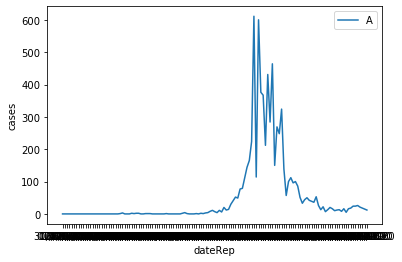

In [38]:
from matplotlib import pyplot as plt

plt.plot(au.dateRep, au.cases)

plt.legend('Australia')
plt.xlabel('dateRep')
plt.ylabel('cases')

plt.gca().invert_xaxis()
plt.show()

In [39]:
zw = df[df.geoId == 'ZW']
zw

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
16270  11/05/2020   11      5  2020      0       0                Zimbabwe   
16271  10/05/2020   10      5  2020      1       0                Zimbabwe   
16272  09/05/2020    9      5  2020      1       0                Zimbabwe   
16273  08/05/2020    8      5  2020      0       0                Zimbabwe   
16274  07/05/2020    7      5  2020      0       0                Zimbabwe   
16275  06/05/2020    6      5  2020      0       0                Zimbabwe   
16276  05/05/2020    5      5  2020      0       0                Zimbabwe   
16277  04/05/2020    4      5  2020      0       0                Zimbabwe   
16278  03/05/2020    3      5  2020      0       0                Zimbabwe   
16279  02/05/2020    2      5  2020      0       0                Zimbabwe   
16280  01/05/2020    1      5  2020      0       0                Zimbabwe   
16281  30/04/2020   30      4  2020      2       0                Zimbabwe   
16282  29/04/2020   29      4  2020      0       0                Zimbabwe   
16283  28/04/2020   28      4  2020      1       0                Zimbabwe   
16284  27/04/2020   27      4  2020      0       0                Zimbabwe   
16285  26/04/2020   26      4  2020      2       0                Zimbabwe   
16286  25/04/2020   25      4  2020      0       1                Zimbabwe   
16287  24/04/2020   24      4  2020      1       0                Zimbabwe   
16288  23/04/2020   23      4  2020      0       0                Zimbabwe   
16289  22/04/2020   22      4  2020      3       0                Zimbabwe   
16290  21/04/2020   21      4  2020      0       0                Zimbabwe   
16291  20/04/2020   20      4  2020      0       0                Zimbabwe   
16292  19/04/2020   19      4  2020      1       0                Zimbabwe   
16293  18/04/2020   18      4  2020      0       0                Zimbabwe   
16294  17/04/2020   17      4  2020      1       0                Zimbabwe   
16295  16/04/2020   16      4  2020      6       0                Zimbabwe   
16296  15/04/2020   15      4  2020      0       0                Zimbabwe   
16297  14/04/2020   14      4  2020      3       0                Zimbabwe   
16298  13/04/2020   13      4  2020      0       0                Zimbabwe   
16299  12/04/2020   12      4  2020      3       0                Zimbabwe   
16300  11/04/2020   11      4  2020      0       0                Zimbabwe   
16301  10/04/2020   10      4  2020      0       1                Zimbabwe   
16302  09/04/2020    9      4  2020      1       1                Zimbabwe   
16303  08/04/2020    8      4  2020      1       0                Zimbabwe   
16304  07/04/2020    7      4  2020      0       0                Zimbabwe   
16305  06/04/2020    6      4  2020      0       0                Zimbabwe   
16306  05/04/2020    5      4  2020      0       0                Zimbabwe   
16307  04/04/2020    4      4  2020      1       0                Zimbabwe   
16308  03/04/2020    3      4  2020      0       0                Zimbabwe   
16309  02/04/2020    2      4  2020      0       0                Zimbabwe   
16310  01/04/2020    1      4  2020      1       0                Zimbabwe   
16311  31/03/2020   31      3  2020      0       0                Zimbabwe   
16312  30/03/2020   30      3  2020      0       0                Zimbabwe   
16313  29/03/2020   29      3  2020      2       0                Zimbabwe   
16314  28/03/2020   28      3  2020      2       0                Zimbabwe   
16315  27/03/2020   27      3  2020      0       0                Zimbabwe   
16316  26/03/2020   26      3  2020      1       0                Zimbabwe   
16317  25/03/2020   25      3  2020      0       0                Zimbabwe   
16318  24/03/2020   24      3  2020      0       1                Zimbabwe   
16319  23/03/2020   23      3  2020      0       0                Zimbabwe   
16320  22/03/2020   22      3  2

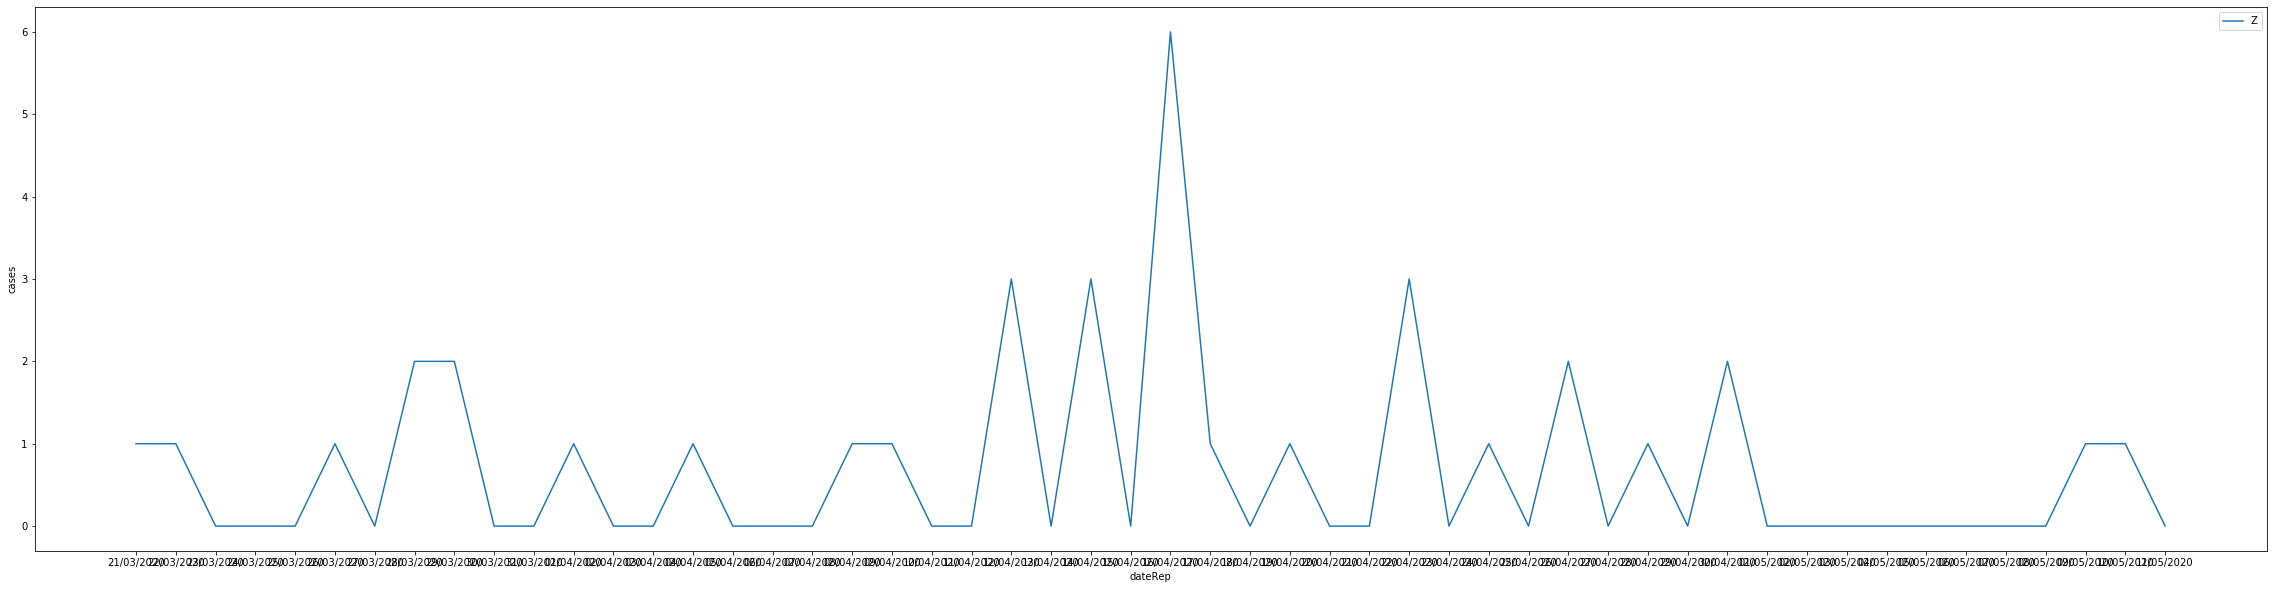

In [43]:
plt.figure(figsize=(40,10))

plt.plot(zw.dateRep, zw.cases)

plt.legend('Zimbabwe')
plt.xlabel('dateRep')
plt.ylabel('cases')

plt.gca().invert_xaxis()

plt.show()